In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# Logistic Regression
**Logistic Regression is a classification algorithm means it is used to predict binary data**

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# df.columns 
# df.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.drop(['adult_male','alive','deck','who','embark_town','class'], axis=1, inplace=True)

In [6]:
# df.info()

In [7]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [8]:
df.dropna( subset='embarked', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     889 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 63.4+ KB


<Axes: >

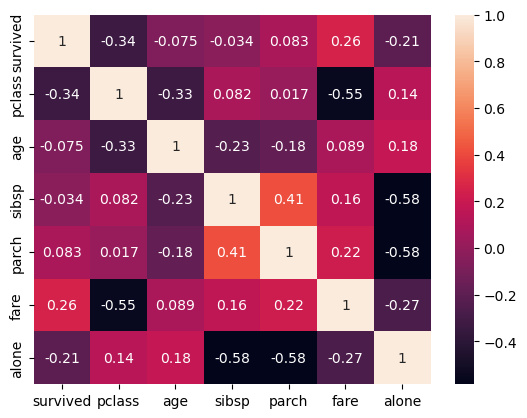

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Labled Encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])
df = df.astype(int)

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


In [15]:
X = df.drop('survived', axis=1)
y = df['survived']

**Data Splitting and Model Building**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
logistic_Model = LogisticRegression()

In [18]:
logistic_Model.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_Logistic_predict = logistic_Model.predict(X_test)

In [20]:
y_Logistic_predict

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [21]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: survived, Length: 178, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
logistic_Accuracy = accuracy_score(y_test, y_Logistic_predict)
logistic_Accuracy

0.8033707865168539

In [24]:
print(confusion_matrix(y_test, y_Logistic_predict))

[[90 19]
 [16 53]]


In [25]:
print(classification_report(y_test,y_Logistic_predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



# KNN algorithm

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [27]:
scaler = StandardScaler()
X_Scaled_Train = scaler.fit_transform(X_train)
X_Scaled_Test = scaler.fit_transform(X_test)

In [28]:
kNN_model = KNeighborsClassifier(n_neighbors=10)

In [29]:
kNN_model.fit(X_Scaled_Train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [30]:
y_KNN_predict = kNN_model.predict(X_Scaled_Test)
# y_KNN_predict

In [31]:
kNN_Accuracy = accuracy_score(y_test,y_KNN_predict)
kNN_Accuracy

0.8089887640449438

In [32]:
print(confusion_matrix(y_test,y_KNN_predict))

[[95 14]
 [20 49]]


In [33]:
print(classification_report(y_test,y_KNN_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       109
           1       0.78      0.71      0.74        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



# Naive bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_model = GaussianNB()

In [36]:
nb_model.fit(X_Scaled_Train,y_train)

GaussianNB()

In [37]:
y_NB_predict = nb_model.predict(X_Scaled_Test)
y_NB_predict

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1])

In [38]:
nb_accuracy = accuracy_score(y_test, y_NB_predict)
nb_accuracy

0.7528089887640449

In [39]:
print(confusion_matrix(y_test,y_NB_predict))

[[89 20]
 [24 45]]


In [40]:
print(classification_report(y_test, y_KNN_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       109
           1       0.78      0.71      0.74        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



# Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
decision_model = DecisionTreeClassifier()

In [43]:
decision_model.fit(X_Scaled_Train,y_train)

DecisionTreeClassifier()

In [44]:
y_Decision_predict = decision_model.predict(X_Scaled_Test)

In [45]:
# y_Decision_predict

In [46]:
decision_Accuracy = accuracy_score(y_test, y_Decision_predict)
decision_Accuracy

0.7752808988764045

In [47]:
print(confusion_matrix(y_test, y_Decision_predict))

[[87 22]
 [18 51]]


In [48]:
print(classification_report(y_test, y_Decision_predict))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.70      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



# Support Vector Machine(SVM) algorithm


In [49]:
from sklearn.svm import SVC

In [50]:
svc_model = SVC(kernel='rbf')

In [51]:
svc_model.fit(X_Scaled_Train, y_train)

SVC()

In [52]:
y_SVC_predict = svc_model.predict(X_Scaled_Test)

In [53]:
svc_Accuracy = accuracy_score(y_test, y_SVC_predict)
svc_Accuracy

0.8258426966292135

In [54]:
print(confusion_matrix(y_test, y_SVC_predict))

[[96 13]
 [18 51]]


In [55]:
print(classification_report(y_test, y_SVC_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.80      0.74      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178



In [56]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


# Cross Validation
Here we have to give the value of cv and it will split the data into cv parts and it will give one part to testing data and all other parts to training data. It will train model with this spliting. After completing this, it will again split the orignal data into cv parts and it will assign some other part or portion of split to testing data and remaining all the parts will be of training data and it will then train the model again on this split. It will iterate this process for cv times.

In [57]:
X1 = df.drop('survived', axis=1)
y1 = df['survived']

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
scaler1 = StandardScaler()

In [60]:
X1_Scaled = scaler1.fit_transform(X1)

In [61]:
scores = cross_val_score(svc_model, X1_Scaled, y1, cv=5, scoring='accuracy')

In [62]:
print(scores)

[0.83146067 0.82022472 0.81460674 0.80898876 0.86440678]


In [63]:
print(scores.mean())

0.8279375357074844
